In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 
from scipy.integrate import odeint
%matplotlib ipympl

In [2]:
def system(r0,t):
    m = 0.1
    r = 0.1
    d = 0.3
    g = 9.81
    dpsi = 400
    I0 = 0.25*m*r**2 + m*d**2
    Iz = 0.5*m*r**2
    
    fi, psi, teta, dteta = r0
    
    pfi = Iz*dpsi*np.cos(np.pi/4)
    dfi = (pfi-Iz*dpsi*np.cos(teta))/(I0*np.sin(teta)**2+Iz*np.cos(teta)**2)
    
    ddtetadt = (dfi**2*np.sin(teta)*np.cos(teta)*(I0-Iz) - dfi*dpsi*Iz*np.sin(teta) + m*g*d*np.sin(teta))/I0
    
    return np.array([dfi,dpsi,dteta,ddtetadt])
    
r0 = np.array([0.,0.,np.pi/4,0])

t = np.linspace(0,5,10000)

sol = odeint(system,r0,t)

Text(0.5, 0, 'z')

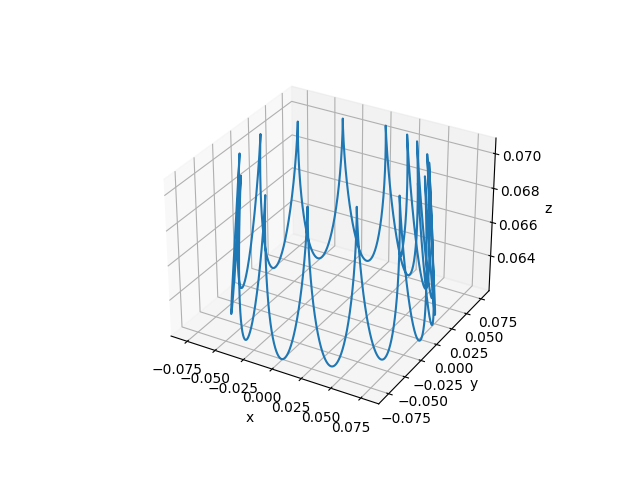

In [3]:
r = 0.1
teta = sol[:, 2]
fi = sol[:, 0]
psi = sol[:, 1]

xsol = r*np.sin(teta)*np.cos(fi)
ysol = r*np.sin(teta)*np.sin(fi)
zsol = r*np.cos(teta)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xsol,ysol,zsol)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

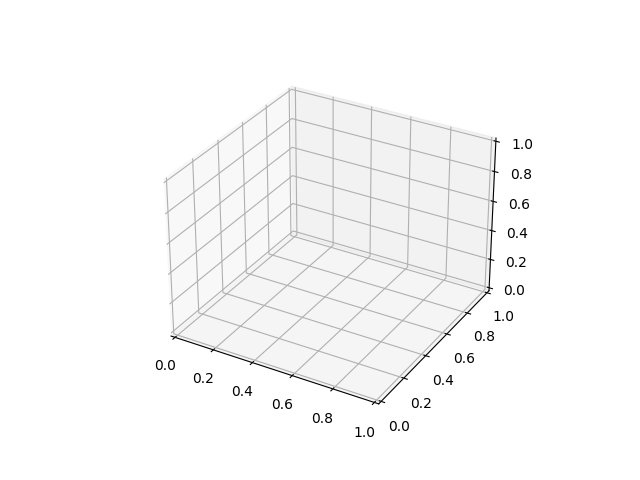

In [4]:
scale = 100
t1 = t[::scale]
x = xsol[::scale]
y = ysol[::scale]
z = zsol[::scale]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

def init():
    ax.clear()

    
def Update(i):
    
    init()
    ax.set_title(r't %.3f' %(t1[i]))
  
    ax.plot(x[:i],y[:i],z[:i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

Aqui se encuentra el periodo

In [5]:
x0 = xsol[0]
y0 = ysol[0]
periodo = []
for i in range(15,len(t)):
    xactual = xsol[i]
    yactual = ysol[i]
    if abs(x0-xactual) < 0.01 and abs(y0-yactual) < 0.01:
        periodo.append(t[i])

min(periodo)

0.007500750075007501